In [1]:
from pathlib import Path
from pprint import pprint
from ost import Sentinel1Batch
from ost.helpers import vector, raster
import json

# load username and pw to access sentinel files
username = json.load(open('login_data.json'))['username']
pw = json.load(open('login_data.json'))['pw']

# define the project directory
project_dir = Path.home() / "Documents" / "Python" / "sen1ost" / "data"

# aoi file name
# aoi_file = 'test_shape2.geojson'
aoi_file = 'flotow_shape_tmp.geojson'

# define aoi with a 2 point coordinates and create a buffer with 20km radius
vector.buffer_shape(str(project_dir) + '/aoi/' + aoi_file, str(project_dir) + '/aoi/aoi_tmp' ,buffer=0.01)
aoi = vector.aoi_to_wkt(str(project_dir) + '/aoi/aoi_tmp')

# define the start and end date
start = "2021-01-01"
end = "2021-12-31"

# initialize the class to s1_grd instance
s1_grd = Sentinel1Batch(
    project_dir=project_dir,
    aoi=aoi,
    start=start,
    end=end,
    product_type="GRD",
    beam_mode="IW",
    polarisation="*",
    ard_type="OST-RTC", #Radiometrically Terrain Corrected, images are corrected for radiometric distortions along mountainous slopes
    max_workers=8,
)

# do the search
# added scihub username and pw in Project.py line 260
s1_grd.search()

 INFO (08:03:33): Created project directory at /home/david/Documents/Python/sen1ost/data
 INFO (08:03:33): Downloaded data will be stored in: /home/david/Documents/Python/sen1ost/data/download.
 INFO (08:03:33): Inventory files will be stored in: /home/david/Documents/Python/sen1ost/data/inventory.
 INFO (08:03:33): Processed data will be stored in: /home/david/Documents/Python/sen1ost/data/processing.
 INFO (08:03:33): Using /home/david/Documents/Python/sen1ost/data/temp as directory for temporary files.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/search.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  geo_df = geo_df.append(gdf)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/search.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  geo_df = geo_df.append(gdf)


 INFO (08:03:38): Writing inventory data to geopackage file: /home/david/Documents/Python/sen1ost/data/inventory/full.inventory.gpkg


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/search.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  geo_df = geo_df.append(gdf)


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


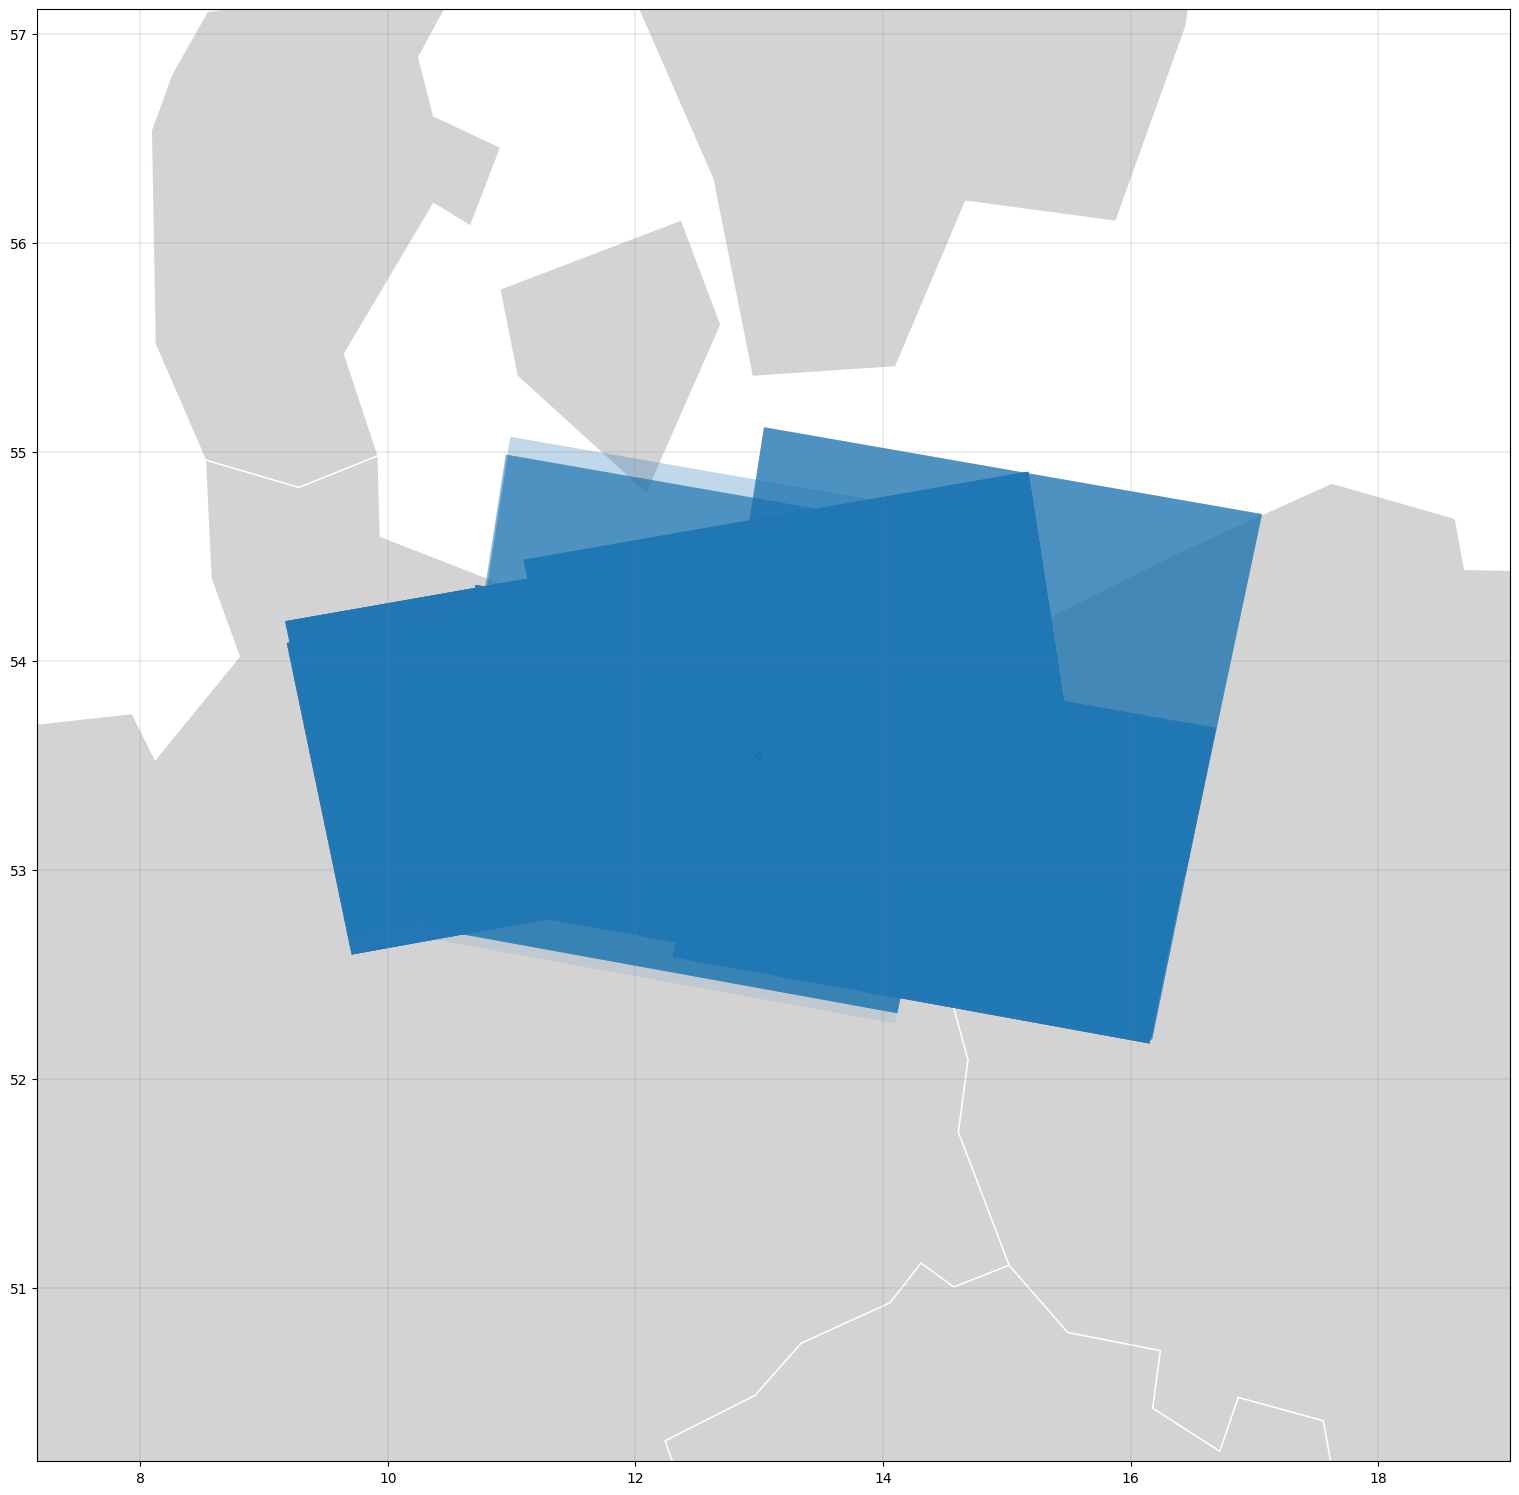

In [2]:
# show orbits / plot inventory
%matplotlib inline
%pylab inline
pylab.rcParams["figure.figsize"] = (19, 19)

s1_grd.plot_inventory(s1_grd.inventory, transparency=0.1)
# s1_grd.inventory

In [2]:
# refine inventory
s1_grd.refine_inventory()

 INFO (08:03:46): Coverage analysis for ASCENDING tracks in VV VH polarisation.
 INFO (08:03:46): 118 frames for ASCENDING tracks in VV VH polarisation.
 INFO (08:03:46): 118 frames remain after double entry removal
 INFO (08:03:46): Excluding track 44
 INFO (08:03:46): Excluding track 146
 INFO (08:03:46): 60 frames remain after non-AOI overlap
 INFO (08:03:46): All remaining tracks fully overlap the AOI. Not removing anything.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/Project.py:352: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  ) = refine_inventory.search_refinement(
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(gdf_date)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

 INFO (08:03:46):  60 frames remain after removal of non-full AOI crossing


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(gdf_date)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(gdf_date)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(gdf_date)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be r

 INFO (08:03:47): Found 60 full coverage mosaics.
 INFO (08:03:47): Coverage analysis for DESCENDING tracks in VV VH polarisation.
 INFO (08:03:47): 119 frames for DESCENDING tracks in VV VH polarisation.
 INFO (08:03:47): 118 frames remain after double entry removal
 INFO (08:03:47): Excluding track 168
 INFO (08:03:47): Excluding track 95
 INFO (08:03:47): 61 frames remain after non-AOI overlap
 INFO (08:03:47): All remaining tracks fully overlap the AOI. Not removing anything.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:433: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(track_gdf)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:451: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/Project.py:352: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` 

 INFO (08:03:48):  61 frames remain after removal of non-full AOI crossing


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(gdf_date)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(gdf_date)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(gdf_date)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be r

 INFO (08:03:49): Found 61 full coverage mosaics.
--------------------------------------------
 Summing up the info about mosaics
--------------------------------------------

 60 mosaics for mosaic key ASCENDING_VVVH

 61 mosaics for mosaic key DESCENDING_VVVH


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:433: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(track_gdf)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:451: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:433: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

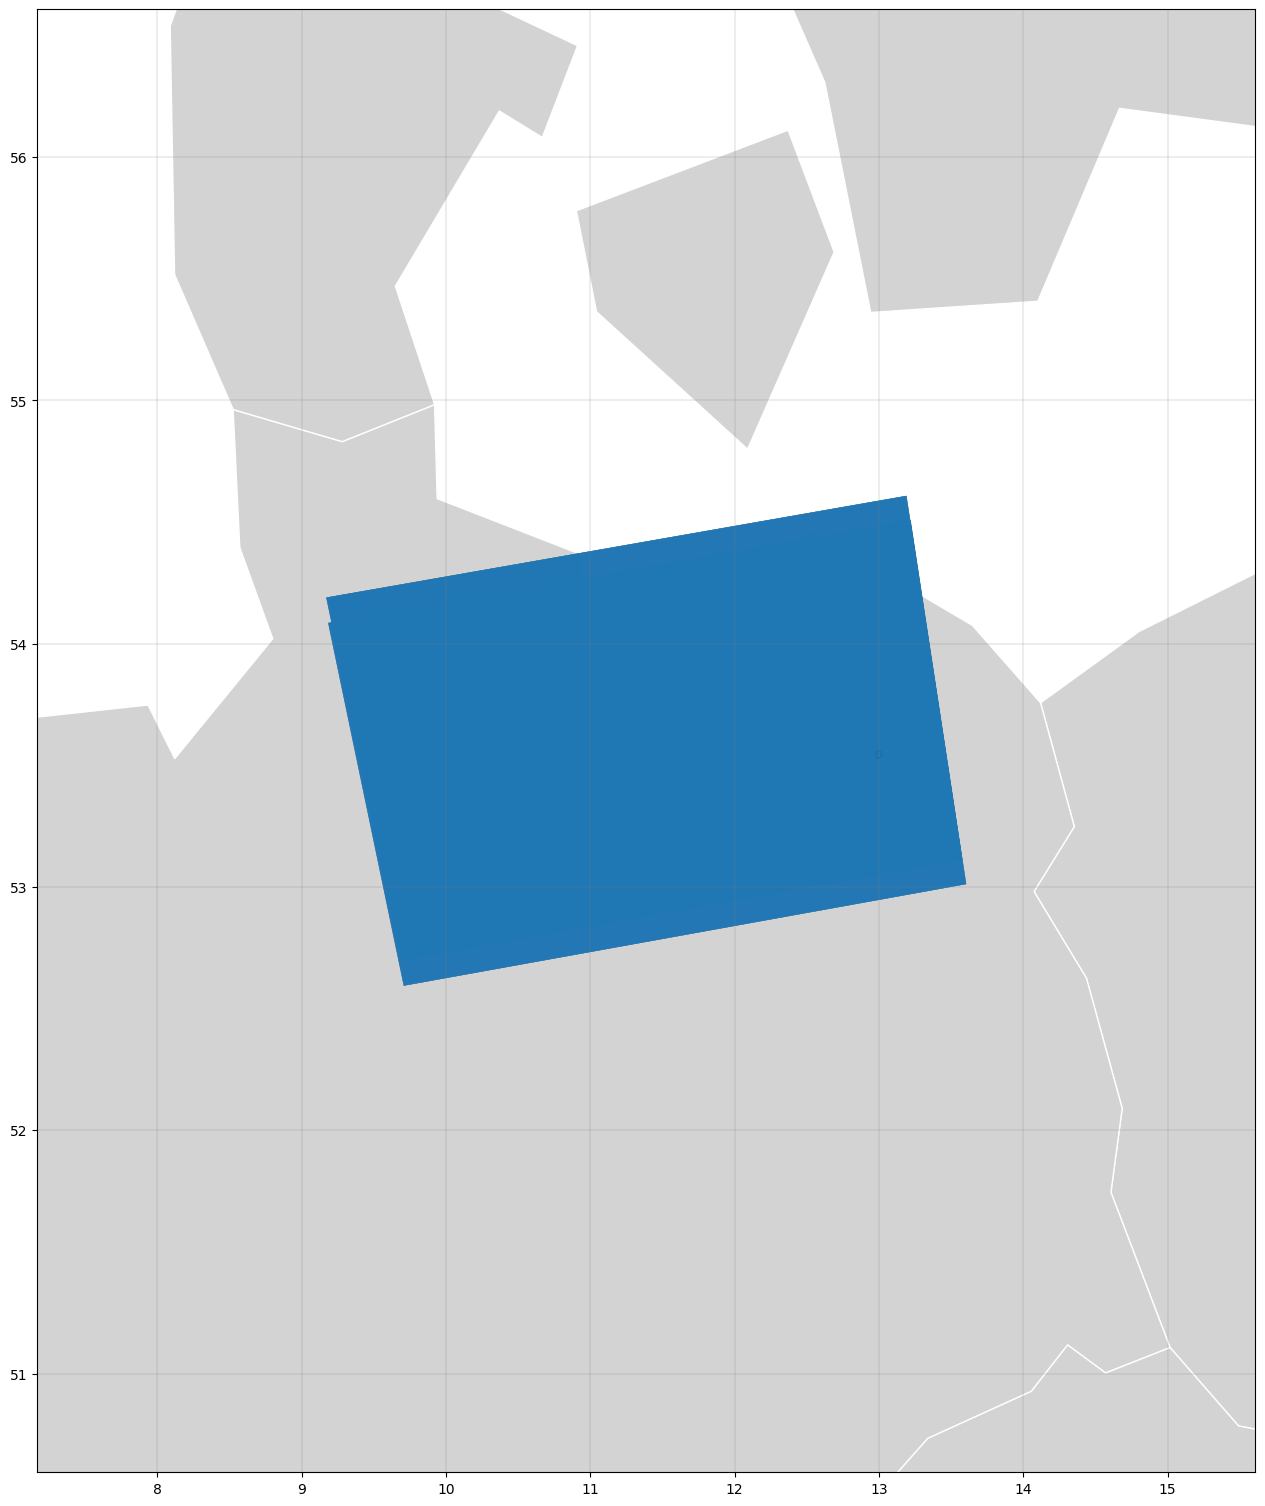

In [15]:
# plot again
pylab.rcParams["figure.figsize"] = (19, 19)
key = "ASCENDING_VVVH"
s1_grd.refined_inventory_dict[key]
s1_grd.plot_inventory(s1_grd.refined_inventory_dict[key], 0.1)

In [16]:
# download ascending orbit images
# key = "ASCENDING_VVVH"
key = "DESCENDING_VVVH"

s1_grd.download(s1_grd.refined_inventory_dict[key], concurrent=10, mirror = '2', uname=username, pword=pw)

 INFO (11:47:19): One or more scene(s) need(s) to be downloaded.
 INFO (11:47:34): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/01/04/S1A_IW_GRDH_1SDV_20210104T170055_20210104T170120_035991_043767_D5C0.zip
 INFO (11:47:34): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/02/03/S1B_IW_GRDH_1SDV_20210203T170010_20210203T170035_025445_0307EF_D1C0.zip
 INFO (11:47:34): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/01/22/S1B_IW_GRDH_1SDV_20210122T170010_20210122T170035_025270_030252_F884.zip
 INFO (11:47:34): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/02/15/S1B_IW_GRDH_1SDV_20210215T170010_20210215T170035_025620_030DA6_C069.zip
 INFO (11:47:34): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/01/16/S1A_IW_GRDH_1SDV_20210116T170054_20210116T170119_036166_043D8C_8AC0.zip
 INFO (11:47:34): Downloa

 INFO: Downloading : 897MB [01:31, 9.83MB/s]                           s]] 
 INFO: Downloading :   4%|▎         | 34.8M/954M [01:37<20:34, 745kB/s]]  

 INFO (11:49:16): S1A_IW_GRDH_1SDV_20210209T170054_20210209T170119_036516_0449B3_33BF.zip passed the zip test.


 INFO: Downloading : 969MB [01:38, 9.83MB/s]                           ]
 INFO: Downloading :  39%|███▉      | 379M/968M [01:44<02:49, 3.48MB/s]]

 INFO (11:49:22): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/03/05/S1A_IW_GRDH_1SDV_20210305T170053_20210305T170118_036866_0455DE_DD90.zip


 INFO: Downloading :  42%|████▏     | 382M/911M [01:45<03:52, 2.28MB/s]]

 INFO (11:49:24): S1B_IW_GRDH_1SDV_20210110T170011_20210110T170036_025095_02FCB9_EA73.zip passed the zip test.


 INFO: Downloading :   6%|▌         | 58.3M/954M [01:52<34:05, 438kB/s]] 

 INFO (11:49:30): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/03/11/S1B_IW_GRDH_1SDV_20210311T170010_20210311T170035_025970_03190A_7589.zip


 INFO: Downloading : 967MB [02:49, 5.69MB/s]                           s]]
 INFO: Downloading :  80%|███████▉  | 763M/956M [02:55<00:12, 15.4MB/s]]  

 INFO (11:50:34): S1A_IW_GRDH_1SDV_20210104T170055_20210104T170120_035991_043767_D5C0.zip passed the zip test.


 INFO: Downloading :  99%|█████████▉| 947M/956M [03:08<00:00, 15.7MB/s]]] 

 INFO (11:50:46): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/03/17/S1A_IW_GRDH_1SDV_20210317T170053_20210317T170118_037041_045C02_DAE9.zip


 INFO: Downloading : 956MB [03:08, 5.07MB/s]                           ]]
 INFO: Downloading : 936MB [01:28, 10.6MB/s]                           s]
 INFO: Downloading :  42%|████▏     | 409M/968M [03:16<15:46, 591kB/s]s]]

 INFO (11:50:54): S1B_IW_GRDH_1SDV_20210227T170010_20210227T170035_025795_03135A_2F7A.zip passed the zip test.


 INFO: Downloading :   8%|▊         | 76.8M/980M [01:27<02:19, 6.49MB/s] 

 INFO (11:51:01): S1A_IW_GRDH_1SDV_20210305T170053_20210305T170118_036866_0455DE_DD90.zip passed the zip test.


 INFO: Downloading :  46%|████▌     | 421M/911M [03:23<14:49, 550kB/s]s]

 INFO (11:51:01): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/03/23/S1B_IW_GRDH_1SDV_20210323T170010_20210323T170035_026145_031EAC_5893.zip


 INFO: Downloading :  13%|█▎        | 123M/980M [01:33<02:09, 6.60MB/s]] 

 INFO (11:51:08): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/03/29/S1A_IW_GRDH_1SDV_20210329T170054_20210329T170119_037216_04620A_739E.zip


 INFO: Downloading : 910MB [04:37, 3.28MB/s]                           /s]
 INFO: Downloading : 937MB [04:37, 3.38MB/s]                           s] 
 INFO: Downloading :  98%|█████████▊| 965M/980M [02:48<00:00, 27.4MB/s]]  

 INFO (11:52:22): S1B_IW_GRDH_1SDV_20210215T170010_20210215T170035_025620_030DA6_C069.zip passed the zip test.


 INFO: Downloading : 980MB [02:48, 5.81MB/s]                           ]
 INFO: Downloading :   8%|▊         | 74.4M/948M [01:31<05:47, 2.52MB/s]

 INFO (11:52:23): S1A_IW_GRDH_1SDV_20210128T170054_20210128T170119_036341_0443A4_6C60.zip passed the zip test.


 INFO: Downloading :  11%|█         | 101M/948M [01:38<02:39, 5.30MB/s]]

 INFO (11:52:29): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/04/04/S1B_IW_GRDH_1SDV_20210404T170010_20210404T170035_026320_032437_DCF3.zip


 INFO: Downloading :   4%|▎         | 35.5M/956M [01:18<03:24, 4.51MB/s]

 INFO (11:52:30): S1B_IW_GRDH_1SDV_20210311T170010_20210311T170035_025970_03190A_7589.zip passed the zip test.


 INFO: Downloading :  51%|█████     | 462M/911M [04:52<01:41, 4.43MB/s]]

 INFO (11:52:30): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/04/10/S1A_IW_GRDH_1SDV_20210410T170054_20210410T170119_037391_046811_E3F7.zip


 INFO: Downloading :   7%|▋         | 63.4M/956M [01:25<03:40, 4.05MB/s]  

 INFO (11:52:37): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/04/16/S1B_IW_GRDH_1SDV_20210416T170011_20210416T170036_026495_0329CA_B60C.zip


 INFO: Downloading : 911MB [05:38, 2.69MB/s]                           s]] 
 INFO: Downloading :  52%|█████▏    | 505M/968M [05:45<16:50, 458kB/s]]]  

 INFO (11:53:23): S1A_IW_GRDH_1SDV_20210116T170054_20210116T170119_036166_043D8C_8AC0.zip passed the zip test.


 INFO: Downloading :  52%|█████▏    | 508M/968M [05:54<47:45, 161kB/s]]s]

 INFO (11:53:32): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/04/22/S1A_IW_GRDH_1SDV_20210422T170055_20210422T170120_037566_046E25_87FB.zip


 INFO: Downloading : 956MB [02:41, 5.93MB/s]                           ]] 
 INFO: Downloading :  53%|█████▎    | 512M/968M [06:16<12:42, 598kB/s]   
 INFO: Downloading :  23%|██▎       | 219M/956M [02:54<03:19, 3.70MB/s]]

 INFO (11:54:00): S1A_IW_GRDH_1SDV_20210329T170054_20210329T170119_037216_04620A_739E.zip passed the zip test.


 INFO: Downloading :   6%|▌         | 55.7M/944M [01:20<02:23, 6.20MB/s]

 INFO (11:54:01): S1A_IW_GRDH_1SDV_20210410T170054_20210410T170119_037391_046811_E3F7.zip passed the zip test.


 INFO: Downloading :   3%|▎         | 31.5M/941M [00:31<1:11:51, 211kB/s]

 INFO (11:54:08): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/04/28/S1B_IW_GRDH_1SDV_20210428T170011_20210428T170036_026670_032F67_9D9D.zip


 INFO: Downloading :  27%|██▋       | 257M/948M [03:17<01:55, 5.98MB/s]  

 INFO (11:54:08): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/05/04/S1A_IW_GRDH_1SDV_20210504T170055_20210504T170120_037741_04743F_4CA9.zip


 INFO: Downloading : 968MB [07:00, 2.30MB/s]                           s]  
 INFO: Downloading :  32%|███▏      | 305M/956M [03:40<18:05, 599kB/s]]  

 INFO (11:54:45): S1B_IW_GRDH_1SDV_20210122T170010_20210122T170035_025270_030252_F884.zip passed the zip test.


 INFO: Downloading :  32%|███▏      | 308M/956M [03:47<17:47, 606kB/s]]  

 INFO (11:54:52): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/05/10/S1B_IW_GRDH_1SDV_20210510T170012_20210510T170037_026845_0334F9_2748.zip


 INFO: Downloading : 944MB [02:14, 7.03MB/s]                           ] 
 INFO: Downloading :  25%|██▍       | 237M/954M [07:23<02:13, 5.37MB/s]] 

 INFO (11:55:02): S1B_IW_GRDH_1SDV_20210416T170011_20210416T170036_026495_0329CA_B60C.zip passed the zip test.


 INFO: Downloading :   2%|▏         | 22.5M/963M [01:02<3:12:22, 81.5kB/s]

 INFO (11:55:15): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/05/16/S1A_IW_GRDH_1SDV_20210516T170056_20210516T170121_037916_047989_FED3.zip


 INFO: Downloading : 948MB [06:09, 2.56MB/s]                           /s]
 INFO: Downloading : 956MB [05:56, 2.68MB/s]                           s]]
 INFO: Downloading :  96%|█████████▋| 920M/954M [09:29<00:03, 10.8MB/s]s] 

 INFO (11:57:08): S1A_IW_GRDH_1SDV_20210317T170053_20210317T170118_037041_045C02_DAE9.zip passed the zip test.


 INFO: Downloading :   6%|▋         | 61.1M/941M [03:32<2:06:30, 116kB/s]]

 INFO (11:57:08): S1B_IW_GRDH_1SDV_20210323T170010_20210323T170035_026145_031EAC_5893.zip passed the zip test.


 INFO: Downloading : 954MB [09:32, 1.67MB/s]                           s]]
 INFO: Downloading :  96%|█████████▌| 908M/946M [04:44<00:02, 15.8MB/s] ]]

 INFO (11:57:17): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/05/28/S1A_IW_GRDH_1SDV_20210528T170056_20210528T170121_038091_047ED3_6626.zip


 INFO: Downloading :   7%|▋         | 62.6M/941M [03:41<1:47:54, 136kB/s] 

 INFO (11:57:18): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/05/22/S1B_IW_GRDH_1SDV_20210522T170012_20210522T170037_027020_033A64_DDBA.zip


 INFO: Downloading :  97%|█████████▋| 921M/946M [04:45<00:01, 16.0MB/s]s]

 INFO (11:57:18): S1A_IW_GRDH_1SDV_20210221T170053_20210221T170118_036691_044FD3_38E4.zip passed the zip test.


 INFO: Downloading : 946MB [04:46, 3.30MB/s]                           s]
 INFO: Downloading : 955MB [02:26, 6.51MB/s]                           ]   
 INFO: Downloading :   9%|▉         | 83.6M/943M [00:04<00:31, 27.5MB/s]]

 INFO (11:57:26): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/06/03/S1B_IW_GRDH_1SDV_20210603T170013_20210603T170038_027195_033F94_26EC.zip


 INFO: Downloading :   4%|▍         | 36.8M/963M [03:14<1:21:17, 190kB/s]

 INFO (11:57:26): S1B_IW_GRDH_1SDV_20210404T170010_20210404T170035_026320_032437_DCF3.zip passed the zip test.


 INFO: Downloading :   0%|          | 52.2k/954M [00:00<1:24:09, 189kB/s]

 INFO (11:57:29): S1B_IW_GRDH_1SDV_20210510T170012_20210510T170037_026845_0334F9_2748.zip passed the zip test.


 INFO: Downloading :  73%|███████▎  | 690M/948M [03:22<02:07, 2.02MB/s]] 

 INFO (11:57:34): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/06/09/S1A_IW_GRDH_1SDV_20210609T170057_20210609T170122_038266_0483FE_817B.zip


 INFO: Downloading :   1%|▏         | 12.6M/954M [00:07<06:16, 2.50MB/s]

 INFO (11:57:37): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/06/15/S1B_IW_GRDH_1SDV_20210615T170014_20210615T170039_027370_0344D7_B06C.zip


 INFO: Downloading : 948MB [04:15, 3.72MB/s]                           s]] 
 INFO: Downloading :   6%|▌         | 59.2M/951M [03:11<1:05:46, 226kB/s] 

 INFO (11:58:33): S1B_IW_GRDH_1SDV_20210428T170011_20210428T170036_026670_032F67_9D9D.zip passed the zip test.


 INFO: Downloading :   6%|▋         | 60.8M/951M [03:21<2:29:38, 99.2kB/s]

 INFO (11:58:43): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/06/21/S1A_IW_GRDH_1SDV_20210621T170058_20210621T170123_038441_04893A_4B0E.zip


 INFO: Downloading : 960MB [01:41, 9.49MB/s]                           s] 
 INFO: Downloading :   8%|▊         | 72.8M/951M [03:47<15:29, 945kB/s]] 

 INFO (11:59:09): S1B_IW_GRDH_1SDV_20210522T170012_20210522T170037_027020_033A64_DDBA.zip passed the zip test.


 INFO: Downloading : 954MB [01:44, 9.17MB/s]                           ]
 INFO: Downloading :  45%|████▍     | 427M/952M [11:42<02:56, 2.98MB/s]]

 INFO (11:59:20): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/06/27/S1B_IW_GRDH_1SDV_20210627T170015_20210627T170040_027545_0349C1_CB82.zip


 INFO: Downloading :  12%|█▏        | 115M/963M [05:07<03:36, 3.91MB/s]]

 INFO (11:59:20): S1B_IW_GRDH_1SDV_20210603T170013_20210603T170038_027195_033F94_26EC.zip passed the zip test.


 INFO: Downloading :   9%|▊         | 85.0M/972M [00:41<02:10, 6.79MB/s] 

 INFO (11:59:28): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/07/03/S1A_IW_GRDH_1SDV_20210703T170059_20210703T170124_038616_048E78_418F.zip


 INFO: Downloading : 952MB [12:40, 1.25MB/s]                           ]   
 INFO: Downloading :  71%|███████▏  | 690M/968M [01:01<00:09, 30.8MB/s]]

 INFO (12:00:24): S1B_IW_GRDH_1SDV_20210203T170010_20210203T170035_025445_0307EF_D1C0.zip passed the zip test.


 INFO: Downloading : 968MB [01:11, 13.6MB/s]                            
 INFO: Downloading :  29%|██▉       | 277M/961M [02:57<02:32, 4.47MB/s]

 INFO (12:00:38): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/07/09/S1B_IW_GRDH_1SDV_20210709T170015_20210709T170040_027720_034EDE_84C3.zip


 INFO: Downloading :  22%|██▏       | 212M/972M [01:54<05:37, 2.25MB/s]

 INFO (12:00:41): S1B_IW_GRDH_1SDV_20210627T170015_20210627T170040_027545_0349C1_CB82.zip passed the zip test.


 INFO: Downloading :  23%|██▎       | 221M/966M [01:17<01:25, 8.73MB/s] 

 INFO (12:00:48): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/07/15/S1A_IW_GRDH_1SDV_20210715T170059_20210715T170124_038791_0493BD_6B9A.zip


 INFO: Downloading : 961MB [03:52, 4.14MB/s]                           s] 
 INFO: Downloading : 966MB [02:06, 7.61MB/s]                             
 INFO: Downloading :  32%|███▏      | 310M/972M [02:53<03:28, 3.17MB/s]]

 INFO (12:01:40): S1B_IW_GRDH_1SDV_20210615T170014_20210615T170039_027370_0344D7_B06C.zip passed the zip test.


 INFO: Downloading :  37%|███▋      | 356M/950M [04:08<02:26, 4.06MB/s]]

 INFO (12:01:45): S1A_IW_GRDH_1SDV_20210703T170059_20210703T170124_038616_048E78_418F.zip passed the zip test.


 INFO: Downloading :  24%|██▍       | 230M/963M [07:34<04:15, 2.87MB/s]]

 INFO (12:01:46): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/07/21/S1B_IW_GRDH_1SDV_20210721T170016_20210721T170041_027895_035419_1A1D.zip


 INFO: Downloading :  41%|████      | 386M/950M [04:15<02:01, 4.65MB/s]] 

 INFO (12:01:52): Downloading scene to: /home/david/Documents/Python/sen1ost/data/download/SAR/GRD/2021/07/27/S1A_IW_GRDH_1SDV_20210727T170100_20210727T170125_038966_0498FF_4410.zip


 INFO: Downloading :  51%|█████     | 494M/972M [03:30<01:12, 6.62MB/s]] 

In [4]:
# define ard product specification
from pprint import pprint
# pprint(s1_grd.ard_parameters["single_ARD"])

s1_grd.ard_parameters["single_ARD"]["resolution"] = 10  # set output resolution to 100m
s1_grd.ard_parameters["single_ARD"]["remove_speckle"] = True  # apply a speckle filter
s1_grd.ard_parameters["single_ARD"]["to_db"] = True
# s1_grd.ard_parameters["mosaic"]["cut_to_aoi"] = False
# s1_grd.ard_parameters["single_ARD"]["apply_ls_mask"] = True
# s1_grd.ard_parameters["single_ARD"]["to_tif"] = True
# s1_grd.ard_parameters["single_ARD"]["out_projection"] = 3857

In [5]:
# preprocess
# key = "ASCENDING_VVVH"
key = "DESCENDING_VVVH"
s1_grd.grds_to_ards(
    inventory_df=s1_grd.refined_inventory_dict[key],
    timeseries=False,
    timescan=False,
    mosaic=True,
    overwrite=True,
    max_workers=8,
)

 INFO (14:51:24): Deleting processing folder to start from scratch
 INFO (14:51:24): Processing acquisition from 20210122 over track 44.
 INFO (14:51:24): Processing acquisition from 20210128 over track 44.
 INFO (14:51:24): Processing acquisition from 20210116 over track 44.
 INFO (14:51:24): Processing acquisition from 20210104 over track 44.
 INFO (14:51:24): Processing acquisition from 20210209 over track 44.
 INFO (14:51:24): Processing acquisition from 20210203 over track 44.
 INFO (14:51:24): Processing acquisition from 20210215 over track 44.
 INFO (14:51:24): Processing acquisition from 20210110 over track 44.
Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-01-01T

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

100% done.
 INFO (14:53:38): Processing acquisition from 20210305 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


180%60% done.
100%Writing...
.13%Executing operator...
20%100%60%180% done.
Writing...
.13%60%140%100% done.
Writing...
.13%.60%100% done.
.60%.60%60%100% done.
Writing...
.13%100% done.
100% done.
 INFO (14:53:40): Processing acquisition from 20210311 over track 44.
.60%100% done.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
Executing operator...
20%140% done.
60%Writing...
.13%.60%100% done.
Executing operator...
20%140% done.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-02-01T00:00:000Z TO 2021-02-31T24:00:000Z]
60%Writing...
.13%OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-02-01T00:00:000Z TO 2021-02-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-03-01T00:00:000Z TO 2021-03-31T24:00:000Z]
.Executing operator...
20%60%100% done.
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND pr

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


15%30%45%60%.70%15%30%45%60%.70%.90%.90%15%30%45%60%.70%.Executing operator...
20%Executing operator...
20%90%Executing operator...
20%Executing processing graph
140%60%60% done.
Writing...
.13%60%100% done.
Writing...
.13%.60%.60%100% done.
100% done.
 INFO (14:53:59): Processing acquisition from 20210323 over track 44.
 INFO (14:53:59): Processing acquisition from 20210329 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

180%100% done.
100%Writing...
.13%.60%100% done.
 INFO (14:54:00): Processing acquisition from 20210404 over track 44.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-03-01T00:00:000Z TO 2021-03-31T24:00:000Z]


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


 done.
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-03-01T00:00:000Z TO 2021-03-31T24:00:000Z]
 done.
 done.
15%30%45%60%.70%.90%Executing processing graph
Executing processing graph
 done.
Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-03-01T00:00:000Z TO 2021-03-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-03-01T00:00:000Z TO 2021-03-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-03-01T00:00:000Z TO 2021-03-31T24:00:000Z]
OpenSearch: 3

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


.60%100% done.
Executing operator...
20%60%100%140% done.
Writing...
.13%100%180% done.
100%Writing...
.13%.60%.60%100% done.
100% done.
Executing operator...
20%Executing operator...
20%Executing operator...
20%180% done.
Writing...
.13%60%100%60%100% done.
Writing...
.13%.60%Executing processing graph
100% done.
.60%100% done.
 INFO (14:55:51): Processing acquisition from 20210416 over track 44.
Executing operator...
20%

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


 INFO (14:55:51): Processing acquisition from 20210422 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


180%100%100% done.
Writing...
.13%Executing operator...
20%.60%100% done.
 INFO (14:55:54): Processing acquisition from 20210428 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-04-01T00:00:000Z TO 2021-04-31T24:00:000Z]
60%Executing operator...
20%100% done.
Writing...
.13%60%100%140% done.
Writing...
.13%OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-04-01T00:00:000Z TO 2021-04-31T24:00:000Z]
.60%.60%Executing operator...
20%100% done.
100% done.
100%180% done.
100%Writing...
.13%.60%100% done.
15%30%45%60%.70%Executing processing graph
.90%140% done.
60%60%Writing...
.13%Executing processing graph
.60%100% done.
Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-04-01T00:00:000Z TO 2021-04-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing operator...
20%Executing operator...
20%Executing processing graph
 done.
Executing operator...
20%100%180% done.
60%Writing...
.13%.60%100% done.
180% done.
100%100%Writing...
.13%OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-05-01T00:00:000Z TO 2021-05-31T24:00:000Z]
.60% INFO (14:56:16): Processing acquisition from 20210510 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


100% done.
 done.
 INFO (14:56:16): Processing acquisition from 20210516 over track 44.
 done.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-05-01T00:00:000Z TO 2021-05-31T24:00:000Z]
140%60% done.
60%Writing...
.13%.60%100% done.
 INFO (14:56:17): Processing acquisition from 20210522 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


15%30%45%60%.70%.90%Executing processing graph
Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-05-01T00:00:000Z TO 2021-05-31T24:00:000Z]
Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-05-01T00:00:000Z TO 2021-05-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-05-01T00:00:000Z TO 2021-05-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-05-01T00:00:000Z TO 2021-05-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


 done.
Executing processing graph
18%36%54%.18%36%54%.72%90%72%90%60%100% done.
Writing...
.13%.60%100% done.
18%36%54%.72%90%Executing operator...
20%Executing operator...
20%140% done.
60%Writing...
.13%60%100%140% done.
Writing...
.13%.60%.60%100% done.
100% done.
Executing processing graph
Executing operator...
20%60%140%100% done.
Writing...
.13%.60% done.
100% done.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-05-01T00:00:000Z TO 2021-05-31T24:00:000Z]
 done.
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-05-01T00:00:000Z TO 2021-05-31T24:00:000Z]
Executing operator...
20%60%100% done.
Writing...
.13%.60%100% done.
 done.
15%30%45%60%.70%.90%Executing operator...
20%Executing operator...
20%180% done.
60%100%Writing...
.13%Executing 

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

60%100%140% done.
Writing...
.13%Executing operator...
20%Executing operator...
20%.60%60%100%140% done.
Writing...
.13%100% done.
.60%100% done.
 done.
180%60%100% done.
Writing...
.13%.60%100% done.
 INFO (14:58:04): Processing acquisition from 20210615 over track 44.
Executing processing graph
Executing processing graph


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing operator...
20%Executing operator...
20%OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-06-01T00:00:000Z TO 2021-06-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-06-01T00:00:000Z TO 2021-06-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-06-01T00:00:000Z TO 2021-06-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-06-01T00:00:000Z TO 2021-06-31T24:00:000Z]
Executing operator...
20%60%100% done.
Writing...
.13%Executing operator...
20%140%60% done.

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


 done.
Executing operator...
20%Executing operator...
20%Executing processing graph
 done.
60%180% done.
100%Writing...
.13%Executing operator...
20%.60%100% done.
140%60%60% done.
Writing...
.13% INFO (14:58:25): Processing acquisition from 20210627 over track 44.
.60%100% done.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


 INFO (14:58:26): Processing acquisition from 20210703 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-06-01T00:00:000Z TO 2021-06-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-06-01T00:00:000Z TO 2021-06-31T24:00:000Z]
180%60%60% done.
Writing...
.13%.60%100% done.
 INFO (14:58:27): Processing acquisition from 20210709 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


15%30%45%60%.70%Executing processing graph
.90%Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-06-01T00:00:000Z TO 2021-06-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-07-01T00:00:000Z TO 2021-07-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-06-01T00:00:000Z TO 2021-06-31T24:00:000Z]
Executing processing graph
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-07-01T00:00:000Z TO 2021-07-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


18%36%54%.72%90%Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
Executing processing graph
 done.
Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-07-01T00:00:000Z TO 2021-07-31T24:00:000Z]
 done.
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-07-01T00:00:000Z TO 2021-07-31T24:00:000Z]
18%36%54%.72%90%15%30%45%60%.70%.90%Executing operator...
20%60%100% done.
Writing...
.13%.60%100% done.
Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
 done.
Executing operator...
20%180% done.
60%100%Executing operator...
Writing...
.20%13%.60% done.
100% done.
60%100%180% done.
Executing operator...
20%Writing...
.13%.Executing operator...
20%60%60%100% done.
Writing...
.13%100% don

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


100% done.
100% done.
180%100% done.
60%Writing...
.13%.60%100% done.
 INFO (14:59:59): Processing acquisition from 20210727 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing processing graph
Executing operator...
20%Executing operator...
20%60%100% done.
Writing...
.13%60%100% done.
Writing...
.13%.60%.100% done.
60%Executing operator...
20%Executing processing graph
100% done.
Executing operator...
20%60%140%100% done.
Writing...
.13%Executing operator...
20%.60%100% done.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-07-01T00:00:000Z TO 2021-07-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-07-01T00:00:000Z TO 2021-07-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-07-01T00:00:000Z TO 2021-07-31T24:00:000Z]
180%100% done.
100%Writing...
.13%60%100% done.
Writing...
.13

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


15%30%45%60%.70%.90%15%30%45%60%.70%.90%Executing operator...
20%Executing operator...
20%Executing operator...
20%180% done.
100%100%Writing...
.13%.60%60%100%140% done.
Writing...
.13%Executing processing graph
100% done.
60%100% done.
.Writing...
.13%60%100% done.
Executing operator...
20%.180% done.
60%100%60%Writing...
.13%100% done.
.60%100% done.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-08-01T00:00:000Z TO 2021-08-31T24:00:000Z]
 done.
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-08-01T00:00:000Z TO 2021-08-31T24:00:000Z]
 done.
15%30%45%60%.70%.90%Executing operator...
20%60%140%100% done.
Writing...
.13%.60%100% done.
Executing operator...
20%Executing operator...
20%60%140%100% done.
60%100%140% done.
Writing...
Writing...


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing operator...
20%Executing operator...
20%Executing operator...
20% done.
60%100%140% done.
Writing...
.13%Executing processing graph
.60%100% done.
140%60% done.
60%Writing...
.13% INFO (15:00:31): Processing acquisition from 20210814 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


.60%60%100%140% done.
Writing...
.13%100% done.
.60%Executing operator...
20%60%140%100% done.
100% done.
Writing...
.13% INFO (15:00:31): Processing acquisition from 20210820 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


.60%100% done.
 INFO (15:00:32): Processing acquisition from 20210826 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-08-01T00:00:000Z TO 2021-08-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-08-01T00:00:000Z TO 2021-08-31T24:00:000Z]
Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
15%30%45%60%.70%.90%OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-08-01T00:00:000Z TO 2021-08-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-08-01T00:00:000Z TO 2021-08-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: ht

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-09-01T00:00:000Z TO 2021-09-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-09-01T00:00:000Z TO 2021-09-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-08-01T00:00:000Z TO 2021-08-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-08-01T00:00:000Z TO 2021-08-31T24:00:000Z]
15%30%45%60%.70%.90%Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
 done.
Executing opera

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


180%100% done.
60%Writing...
.13%.60%100% done.
 INFO (15:01:44): Processing acquisition from 20210913 over track 44.
Executing operator...
20%

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing processing graph
Executing operator...
20%140% done.
60%Writing...
.13%Executing processing graph
.60%100% done.
60%100%140% done.
Writing...
.13%Executing operator...
20%60%100%140% done.
Writing...
.13%18%36%54%..60%.72%60%90%100% done.
100% done.
Executing operator...
20%140%60% done.
60%Writing...
.13%.60%100% done.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-09-01T00:00:000Z TO 2021-09-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-09-01T00:00:000Z TO 2021-09-31T24:00:000Z]
Executing processing graph
Executing processing graph
15%30%45%60%.70%.90%Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginpo

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing operator...
20%Executing operator...
20%60%Executing operator...
20%100% done.
Writing...
.13%60%100% done.
.Writing...
.13%60%100% done.
Executing operator...
20%.60%100% done.
60%100%140% done.
Writing...
.13%.60%100% done.
Executing processing graph
140%140% done.
Writing...
.13%.60%100% done.
Executing operator...
20%60%140%100% done.
Writing...
.13%.60%100% done.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-09-01T00:00:000Z TO 2021-09-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-09-01T00:00:000Z TO 2021-09-31T24:00:000Z]
Executing operator...
20%Executing operator...
20%15%30%45%60%.70%.90%Executing operator...
20%Executing processing graph
60%100% done.
Writing...
.13%.60%Executing operator...
20%100% done.

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing operator...
20%Executing operator...
20%60%100% done.
Writing...
.13%.60%Executing operator...
20%100% done.
Executing operator...
20%Executing processing graph
180% done.
100%100%Writing...
.13%.60%100% done.
 INFO (15:02:34): Processing acquisition from 20211001 over track 44.
180%100%60% done.
Writing...
.13%180%100% done.
100%Writing...
.13%

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


.60%.100% done.
60% INFO (15:02:35): Processing acquisition from 20211007 over track 44.
100% done.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-09-01T00:00:000Z TO 2021-09-31T24:00:000Z]


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


 INFO (15:02:35): Processing acquisition from 20211013 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-09-01T00:00:000Z TO 2021-09-31T24:00:000Z]
Executing operator...
20%15%30%45%60%.70%.90%Executing processing graph
Executing processing graph
60%100% done.
Writing...
.13%Executing processing graph
.60%100% done.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-10-01T00:00:000Z TO 2021-10-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-10-01T00:00:000Z TO 2021-10-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-10-01T00:00:000

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


 done.
Executing processing graph
Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-10-01T00:00:000Z TO 2021-10-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-10-01T00:00:000Z TO 2021-10-31T24:00:000Z]
Executing processing graph
15%30%45%60%.70%.90%Executing operator...
20%60%100% done.
Writing...
.13%18%36%54%..60%100% done.
72%90%Executing processing graph
18%36%54%.72%90% done.
 done.
Executing operator...
20%100%100%180% done.
Writing...
.13% done.
.60%100% done.
Executing operator...
20%Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
100%100%180% done.
Writing...
.13%.60%100% done.
Executing operator...
20%100%100%180% done.
Wri

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing processing graph
18%36%54%.72%90%Executing operator...
20%Executing processing graph
180%100%60% done.
Writing...
.13%.60%100% done.
 INFO (15:03:26): Processing acquisition from 20211031 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-10-01T00:00:000Z TO 2021-10-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-10-01T00:00:000Z TO 2021-10-31T24:00:000Z]
 done.
15%30%45%60%.70%.90%Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-10-01T00:00:000Z TO 2021-10-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-10-01T00:00:000Z TO 2021-10-31T24:00:000Z]
Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
15%30%45%60%.70

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing operator...
20%60%100%140% done.
Writing...
.13%Executing operator...
20%60%180% done.
100%Writing...
.13%.60% done.
.60%100% done.
100% done.
Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
18%36%54%.72%90%OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-11-01T00:00:000Z TO 2021-11-31T24:00:000Z]
Executing operator...
20%60%100% done.
Writing...
.13%OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-11-01T00:00:000Z TO 2021-11-31T24:00:000Z]
18%36%54%..60%18%36%54%.72%100% done.
90%72%90%15%30%45%60%.70%.90% done.
 done.
 done.
Executing operator...
20%Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
180%60%100% done.
Writing...
.13%.60%100% done.
 done.

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing operator...
20%60%100%140% done.
Writing...
.13%Executing operator...
20%.60%60%140%100% done.
Writing...
.13%100% done.
.60%100% done.
Executing operator...
20%60%140%100% done.
Writing...
.13%Executing operator...
20%60%140%100% done.
Writing...
.13%.60%.60%100% done.
100% done.
Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-11-01T00:00:000Z TO 2021-11-31T24:00:000Z]
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-11-01T00:00:000Z TO 2021-11-31T24:00:000Z]
Executing operator...
20%Executing operator...
20%15%30%45%60%.70%.Executing operator...
20%90%Executing operator...
20%60%100% done.
Writing...
.13%.60%100% done.
60%100% done.
Writing...
.13%.60%100% done.
 INFO (15:04:32): Processing acquisition fro

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


140% done.
60%Writing...
.13%60%100%140% done.
Writing...
.13%.60%.60%100% done.
100% done.
 INFO (15:04:34): Processing acquisition from 20211124 over track 44.
 INFO (15:04:34): Processing acquisition from 20211130 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

Executing operator...
20%180% done.
100%60%Writing...
.13%.60%100% done.
Executing processing graph
Executing operator...
20%60%180% done.
100%Writing...
.13%.60%Executing operator...
20%180% done.
100%Writing...
.13%60% done.
100% done.
.60%Executing processing graph
100% done.
Executing processing graph
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-11-01T00:00:000Z TO 2021-11-31T24:00:000Z]
Executing processing graph
OpenSearch: 31 total results on 1 pages.
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:B AND producttype:AUX_POEORB AND beginposition:[2021-11-01T00:00:000Z TO 2021-11-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/gnss/search?q=platformname:Sentinel-1 AND platformnumber:A AND producttype:AUX_POEORB AND beginposition:[2021-11-01T00:00:000Z TO 2021-11-31T24:00:000Z]
OpenSearch: https://scihub.copernicus.eu/gn

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


 done.
 done.
 done.
Executing processing graph
 done.
Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
15%30%45%60%.70%.90%Executing operator...
20%60%100%180% done.
Writing...
.13%.60%100% done.
Executing operator...
20%60%180%100% done.
Writing...
.13%.60%100% done.
 done.
Executing operator...
20%Executing operator...
20%60%140% done.
180%Writing...
.13%.60%100% done.
140%60%60% done.
Writing...
.13%.60%100% done.
Executing operator...
20%60%100% done.
Writing...
.13%.60%Executing processing graph
100% done.
Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
18%36%54%.72%90%Executing operator...
20%60%140%100% done.
Writing...
.13%.60%100% done.
Executing processing graph
Executing operator...
20%18%36%54%.72%90%180% done.
100%100%Writing...
.13% done.
.60%100% done.
 INFO (15:05:13): Processing acquisition from 20211212 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing operator...
20%140%60%60% done.
Writing...
.13%.60%100% done.
Executing processing graph
 INFO (15:05:17): Processing acquisition from 20211218 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


 done.
Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
15%30%45%60%.70%.90%Executing processing graph
Executing operator...
20%60%100%140% done.
Writing...
.13%.60%15%30%45%60%.70%100% done.
.90%Executing operator...
20%60%100% done.
Writing...
.13%.60%100% done.
 done.
Executing operator...
20%180% done.
100%100%Writing...
.13%.60% done.
100% done.
Executing operator...
20%180%100% done.
60%Writing...
.13%.60%100% done.
Executing operator...
20%60%100%140% done.
Writing...
.13%.60%100% done.
Executing operator...
20%100%60%180% done.
Writing...
.13%.60%100% done.
Executing operator...
20%Executing operator...
20%60%100% done.
Writing...
.13%60%140%100% done.
Writing...
.13%..60%60%Executing processing graph
100% done.
100% done.
Executing operator...
20%18%36%54%.72%90%Executing processing graph
180% done.
100%60%Writing...
.13%.60%100% done.
 INFO (15:05:40): Processing acquisition from 20211230 over track 44.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing processing graph
18%36%54%.72%90%Executing operator...
20%18%36%54%.72%90% done.
Executing processing graph
180% done.
100%100%Writing...
.13%.60%100% done.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


15%30%45%60%.70% done.
.90%Executing operator...
20%60%100%140% done.
Writing...
.13%.60% done.
100% done.
Executing operator...
20%60%140%100% done.
Writing...
.13%Executing operator...
20%180%100% done.
100%.Writing...
.13%60%100% done.
.60%100% done.
Executing operator...
20%60%100% done.
Writing...
.13%.60%100% done.
Executing processing graph
Executing operator...
20%Executing processing graph
60%100% done.
Writing...
.13%Executing processing graph
.60%100% done.
Executing operator...
20% done.
18%36%54%.60%140%100% done.
Writing...
.13%72%90%.60%100% done.
18%36%54%.72%90%18%36%54%.72%90%Executing operator...
20%140% done.
60%Writing...
.13%.60%100% done.
Executing operator...
20% done.
Executing operator...
20%60%140% done.
Writing...
.13% done.
.60%Executing operator...
20%100% done.
 done.
180% done.
60%100%Writing...
.13%.60%100% done.
60%140% done.
100%Writing...
.13%.60%100% done.
Executing operator...
20%Executing processing graph
60%140% done.
100%Writing...
.13%.60%100% 

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


60%100% done.
Executing operator...
20%Writing...
.13%60%100%180% done.
Writing...
.13%.60%100% done.
.60%Executing operator...
20%100% done.
180% done.
100%100%Writing...
.13%.60%100% done.
140% done.
60%60%Writing...
.13%.140% done.
60%60%60%Writing...
.13%100% done.
.60%100% done.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing operator...
20%60%

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


100%140% done.
Writing...
.13%.60%100% done.
Executing operator...
20%60%100% done.
Writing...
.13%.60%Executing operator...
20%60%140%100% done.
Writing...
.13%100% done.
.60%100% done.
Executing operator...
20%60%140%100% done.
Writing...
.13%.60%100% done.
Executing operator...
20%Executing operator...
20%60%100%140% done.
Writing...
.13%.60%Executing operator...
20%100% done.
Executing operator...
20%180%100% done.
100%Writing...
.13%.60%140% done.
60%Writing...
.13%100% done.
.60%100% done.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


180%100% done.
100%Writing...
.13%.60%

/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


100% done.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


Executing operator...
20%60%100%180% done.
Writing...
.13%.60%100% done.
Executing operator...
20%100%100%180% done.
Writing...
.13%.60%100% done.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


,identifier,outfile,out_ls,error


In [7]:
# convert img to tiff
import gdal
import os

for u in ['Gamma0_VV_db','Gamma0_VH_db']:
# for u in ['Gamma0_VV','Gamma0_VH']:
    paths = list(Path(project_dir).rglob(str(u + '.img')))
    for i in paths:
        inpath = str(i)
        outpath = str(project_dir) + '/out/' + u + '_' + os.path.split(os.path.split(os.path.split(i)[0])[0])[1] + '.tiff'
        ds = gdal.Open(inpath)
        ds = gdal.Translate(outpath, ds)
        ds = None
        raster.mask_by_shape(outpath,outpath, str(project_dir) + '/aoi/' + aoi_file, rescale=False, description=False, to_db=False)

# %%bash
# gdal_translate -of GTiff /home/david/OST_Tutorials/Tutorial_1/15/20220509/20220509_15_bs.data/Gamma0_VH_db.img /home/david/OST_Tutorials/Tutorial_1/15/20220509/20220509_15_bs.data/Gamma0_VH_db.tiff